In [1]:
#1990 Bay Area Housing Data Exploration & Insights

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [3]:
!dir | findstr -i housing.csv 

04/01/2021  12:30 PM         1,195,690 housing.csv


In [4]:
housing = pd.read_csv('housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

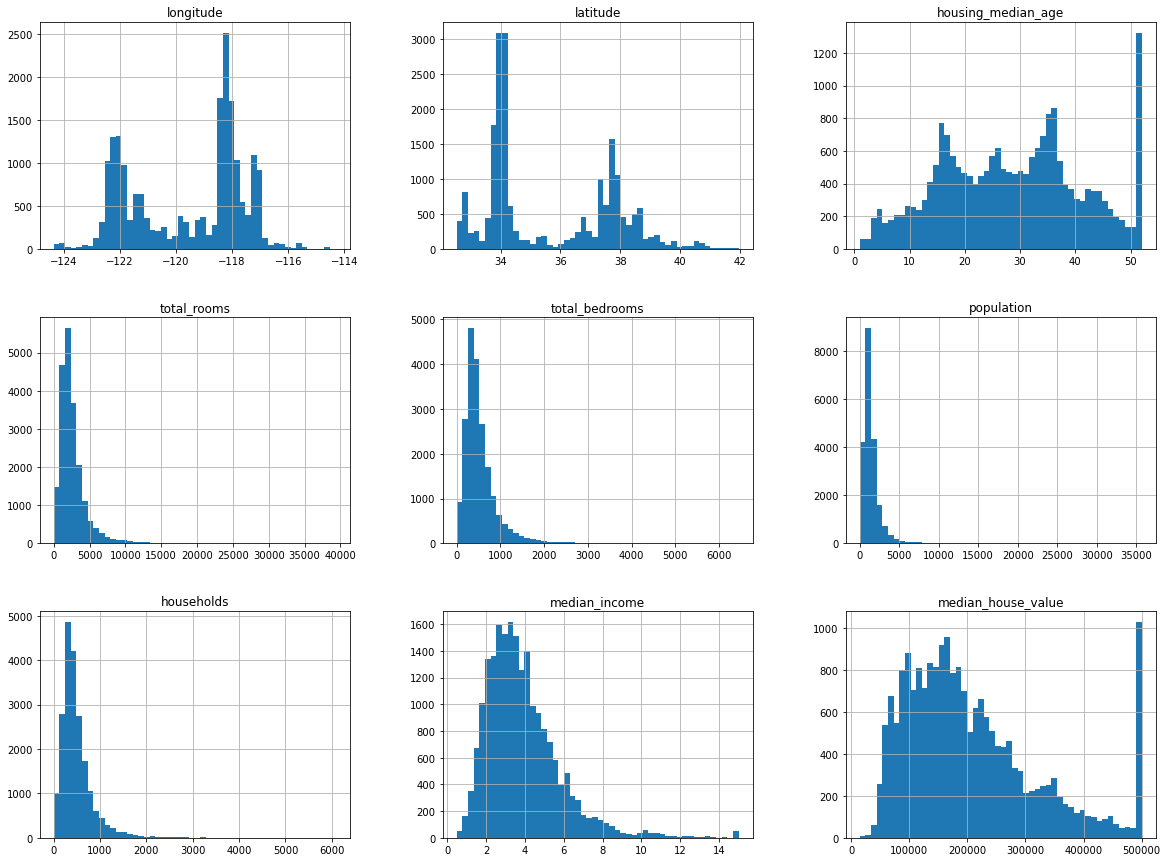

In [8]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

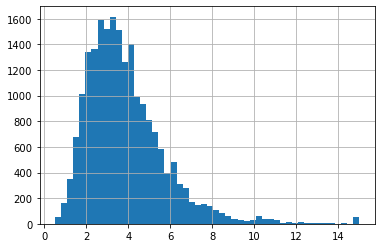

In [9]:
#median_income is right skewed
#note: median_income is in tens of thousands U.S. Dollars

housing['median_income'].hist(bins=50)

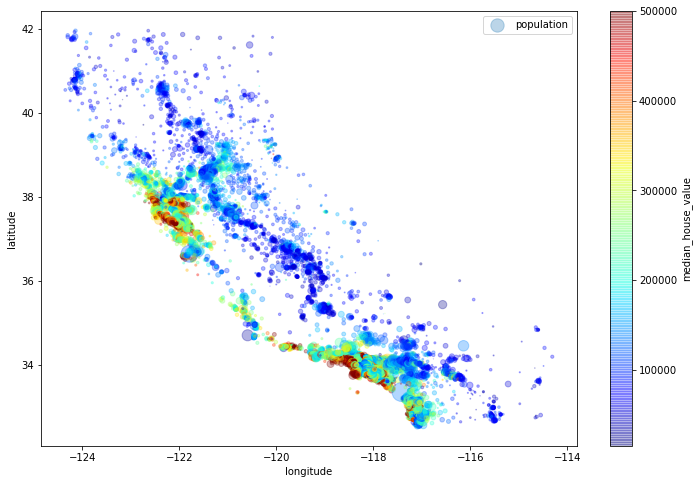

In [10]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
            s=housing['population']/100, label='population', figsize=(12, 8), 
            c='median_house_value', cmap=plt.get_cmap('jet'), sharex=False)

plt.legend()

In [ ]:
#We can tell that neighborhoods near the ocean tend to have higher house values as opposed to inland
#Houses inland are much cheaper and have a larger density of mid to larger sized neighborhoods in terms of population

In [11]:
#Pearson's distance correlation
corr_matrix=housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

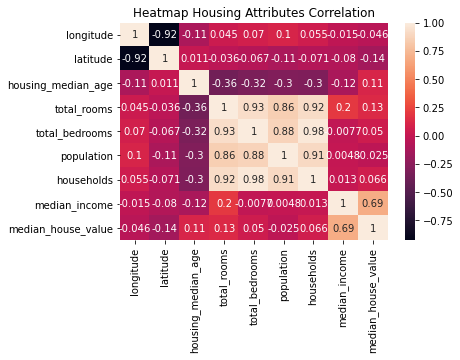

In [12]:
correlated_housing = housing.corr()
sns.heatmap(correlated_housing, annot=True)
plt.title('Heatmap Housing Attributes Correlation')
plt.show()

In [13]:
#Identifying Outliers and what is the proportion of Outliers
x = housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'households', 
             'total_bedrooms', 'population']]        
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
Housing_IQR = Q3 - Q1
Housing_IQR

median_house_value    145125.00000
median_income              2.17985
total_rooms             1700.25000
housing_median_age        19.00000
households               325.00000
total_bedrooms           351.00000
population               938.00000
dtype: float64

In [15]:
lower_limit = Q1 - 1.5*Housing_IQR
upper_limit = Q3 + 1.5*Housing_IQR

outliers = housing[((housing < lower_limit) | (housing > upper_limit )).any(axis=1)]
print(len(outliers))

non_outliers = housing[~((housing < lower_limit) | (housing > upper_limit )).any(axis=1)]
print(len(non_outliers))

3019
17621


In [16]:
proportion_outliers = len(outliers) / len(housing)
print(proportion_outliers)

0.14626937984496124


In [ ]:
#There is a high proportion of outliers, yet it might be better to keep them and ask an industry leader why this is the case

In [17]:
##We know total berdrooms has some missing values, We will replace null values with the row median

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')

In [19]:
housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [21]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [22]:
X = imputer.transform(housing_num)

In [23]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [24]:
#cross check for missing values
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [25]:
#no missing numerical values as seen above

In [26]:
print(housing_tr.describe())
print(housing_tr.info())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

<AxesSubplot:>

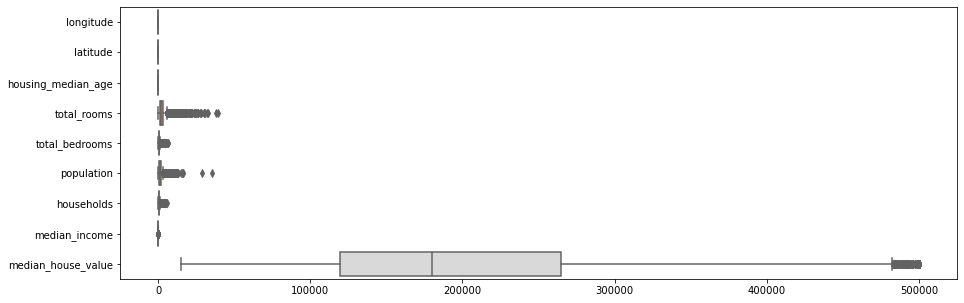

In [27]:
mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=housing_tr, palette="Set3", orient='h')

In [28]:
#Same boxplots except dropping latitude, longitude, and median_house_value.

<AxesSubplot:>

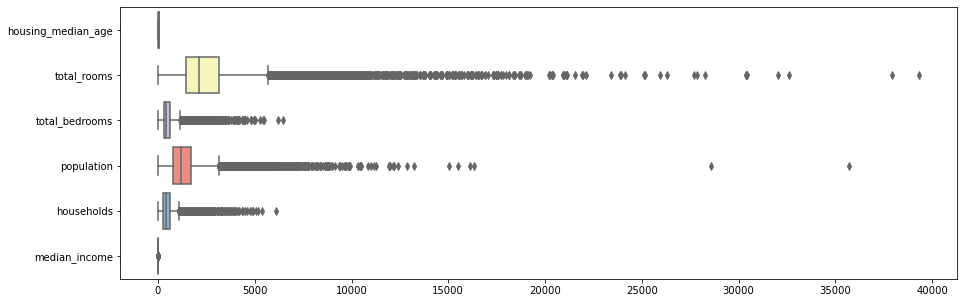

In [29]:
X = housing_tr[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]

mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=X, palette="Set3", orient='h')

In [30]:
#not sure why total rooms has so many outliers. This is total rooms in this location or block. With some feature engineering
#we can add rooms per household and population per household category

In [31]:
#feature engineering

In [32]:
housing_tr['bedrooms_per_room'] = housing_tr['total_bedrooms']/housing_tr['total_rooms']
housing_tr['population_per_household'] = housing_tr['population']/housing_tr['households']
housing_tr['rooms_per_household'] = housing_tr['total_rooms']/housing_tr['households']

In [ ]:
#I will create the boxplot above with newly engineered features
#without outliers
#without longitude, latitude, median_house_value

In [52]:
outliers_tr = housing_tr[((housing_tr < lower_limit) | (housing_tr > upper_limit )).any(axis=1)]
print(len(outliers))

non_outliers_tr = housing_tr[~((housing_tr < lower_limit) | (housing_tr > upper_limit )).any(axis=1)]
print(len(non_outliers))

3019
17621


In [53]:
cleaned_non_outliers_for_boxplot = non_outliers_tr[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
                                                'households', 'median_income', 'bedrooms_per_room', 'population_per_household',
                                                'rooms_per_household']]

<AxesSubplot:>

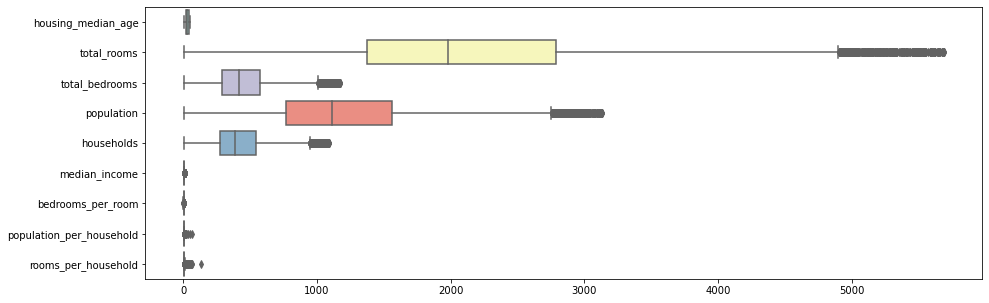

In [54]:
sns.boxplot(data=cleaned_non_outliers_for_boxplot, palette="Set3", orient='h')

<AxesSubplot:>

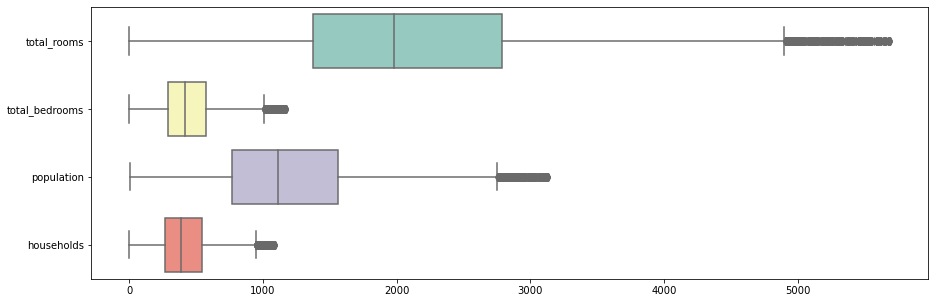

In [74]:
closer = non_outliers_tr[['total_rooms', 'total_bedrooms', 'population', 
                                                'households']]

sns.boxplot(data=closer, palette="Set3", orient='h')

In [ ]:
#It's hard to make any judgement based on these charts in regards to home prices, however the boxchart shows us the central 
#tendencies for each attribute nicely

<AxesSubplot:>

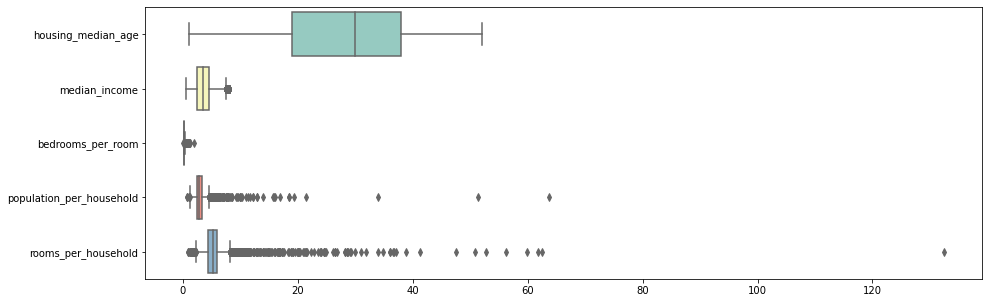

In [55]:
#perhaps we can filter out a few more attributes to see the other ones more clearly
cleaned_non_outliers_for_boxplot2 = non_outliers_tr[['housing_median_age', 
                                                'median_income', 'bedrooms_per_room', 'population_per_household',
                                                'rooms_per_household']]
sns.boxplot(data=cleaned_non_outliers_for_boxplot2, palette="Set3", orient='h')

<AxesSubplot:>

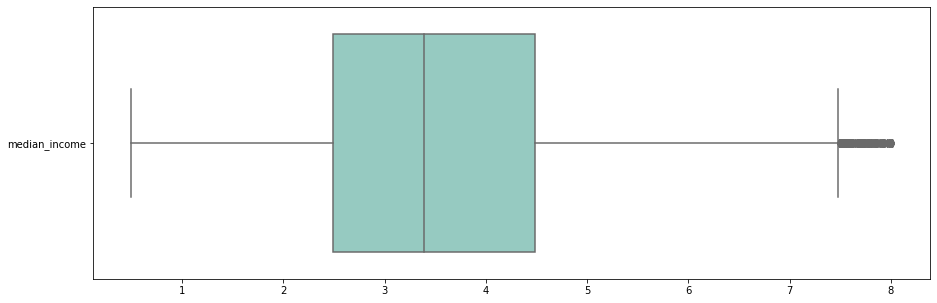

In [56]:
median_income_box = non_outliers_tr[['median_income']]
sns.boxplot(data=median_income_box, palette="Set3", orient='h')

<AxesSubplot:>

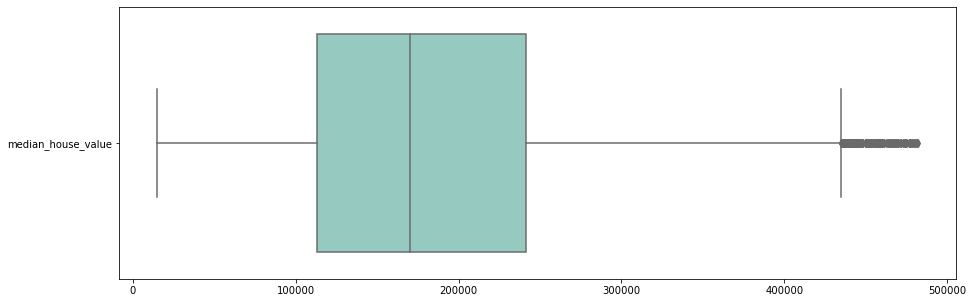

In [57]:
median_home_value_box = non_outliers_tr[['median_house_value']]
sns.boxplot(data=median_home_value_box, palette="Set3", orient='h')

In [ ]:
#median_income and median_house_value have a similar looking distribution in terms of shape
#remember they are the most highly correlated, which is obvious
#with higher income, one can afford a more expensive residence
#both are right skewed with fewer people either making really high income or living in very expensive houses

In [73]:
print(housing_tr.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [ ]:
#Central Tendencies: House Median Age: 28.64 Population per Block: 1,425.47 Households per BLock: 499.54 
#Median Income: 38,706,.71 Median House Value: 206,855.82 Population per Household: 3.07 Rooms per Household: 5.43

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

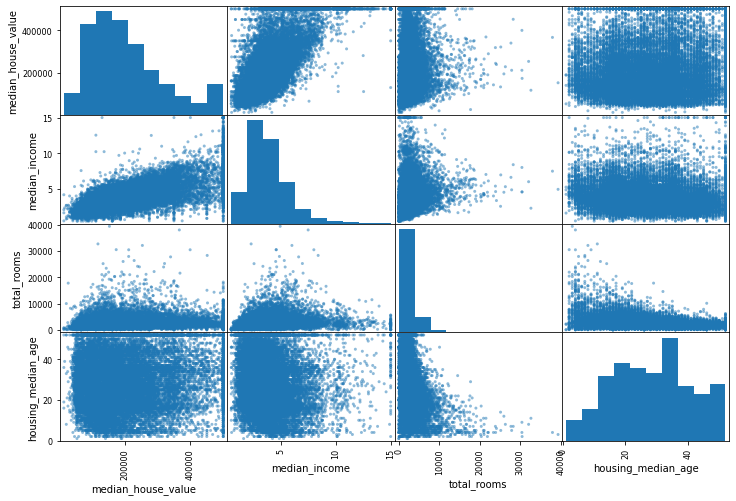

In [58]:
#scatter plots A vs B fashion (issue is that there will so many plots)

housing_attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

from pandas.plotting import scatter_matrix

scatter_matrix(housing[housing_attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

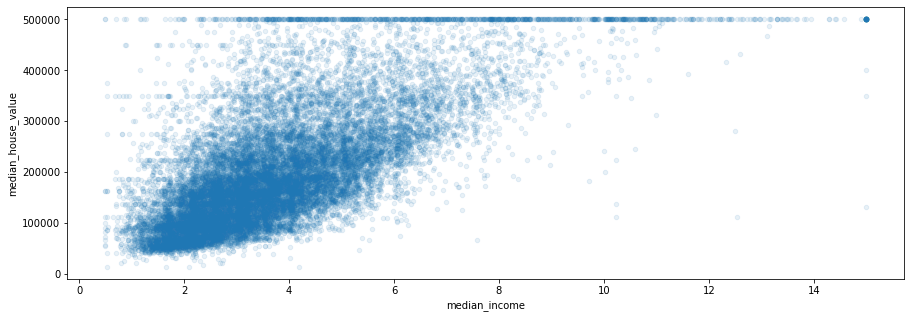

In [59]:
housing_tr.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

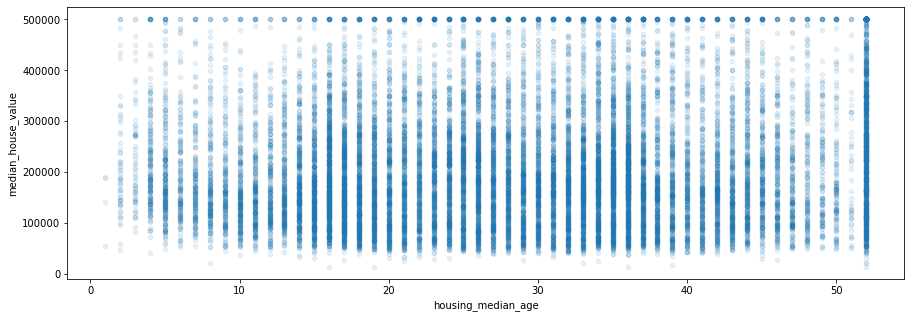

In [67]:
housing_tr.plot(kind='scatter', x='housing_median_age', y='median_house_value', alpha=0.1)

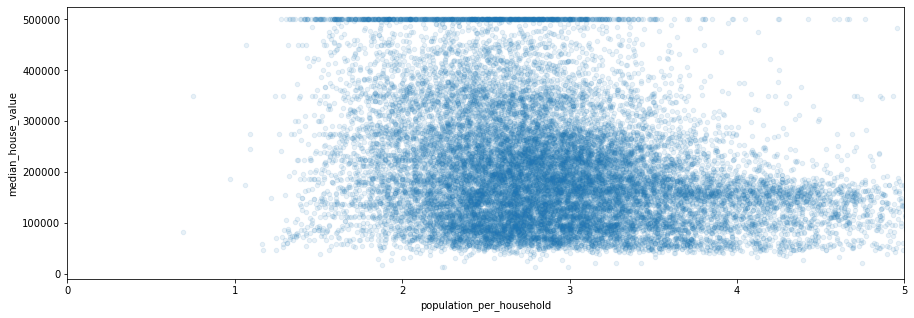

In [70]:
housing_tr.plot(kind='scatter', x='population_per_household', y='median_house_value', alpha=0.1)
ax = plt.gca()
ax.set_xlim([0,5])
plt.show()

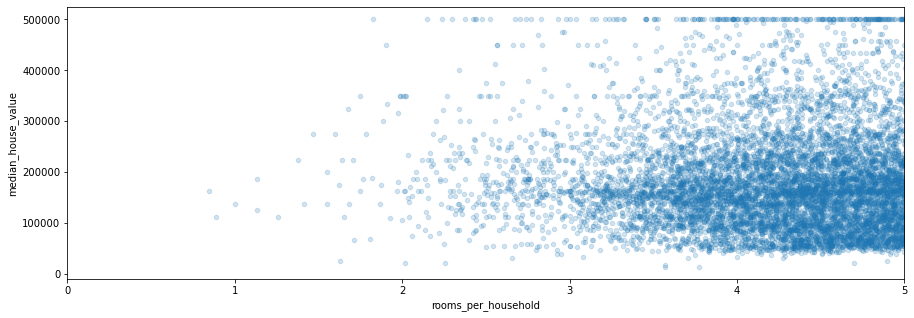

In [60]:
housing_tr.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2)
ax = plt.gca()
ax.set_xlim([0,5])
plt.show()

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

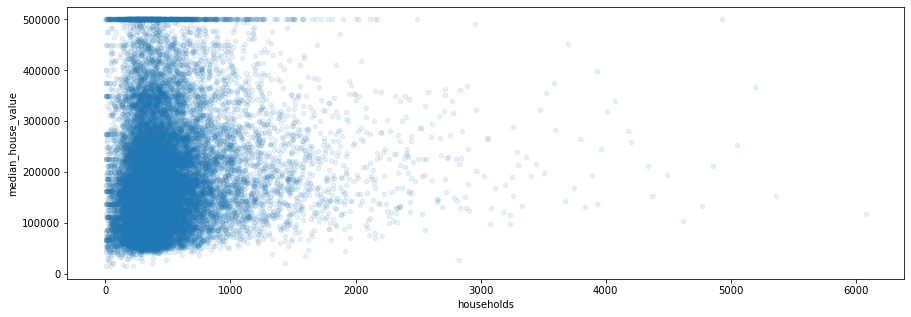

In [71]:
housing_tr.plot(kind='scatter', x='households', y='median_house_value', alpha=0.1)

In [ ]:
#Again median income to median house value show the highest correlation, and we see some sort of upward linear regression
#population per household, rooms per household, and households in a neighborhood show a dense sweet spot, or a tendency to 
#fall into a heavy range
#The median house age shows close to no correlation to housing value, house value fluctuates from relatively cheap to very expensice
#regardless if the home is brand new or 50+ years old

In [33]:
corr_matrix = housing_tr.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

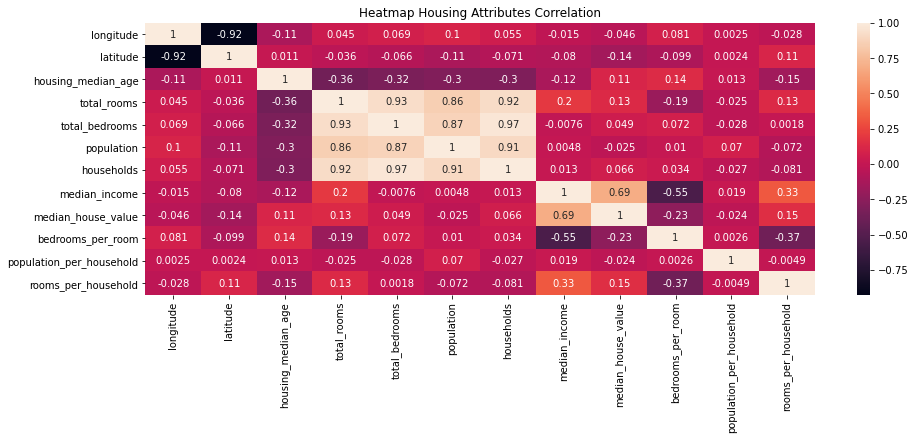

In [34]:
correlated_housing = housing_tr.corr()
sns.heatmap(correlated_housing, annot=True)
plt.title('Heatmap Housing Attributes Correlation')
plt.show()

In [43]:
#I think something is wrong with total bedrooms data. It is extremely low compared to total rooms, and mean bedrooms per household 
#is less than one. It also was the only row with missing values. I will drop this category for my attempt at a
#price prediction model
#I will also drop a few more attributes and replace them with my new featured attributes
#Info below shows the central tendancies for all attributes, the average populaton per household was about 3.07, average rooms
#per household was about 5.42, median houshold value = $206,855, median age = 28.639, median household income = $38,706.71
#about 499.539 households per location(neighborhood block)

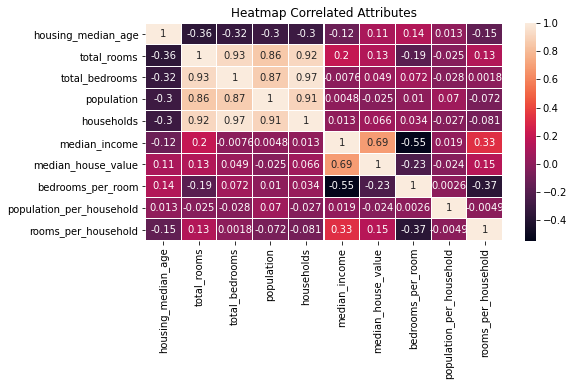

In [44]:
corr = housing_tr.drop(['longitude', 'latitude'],axis=1).corr()
fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap Correlated Attributes")
plt.show()

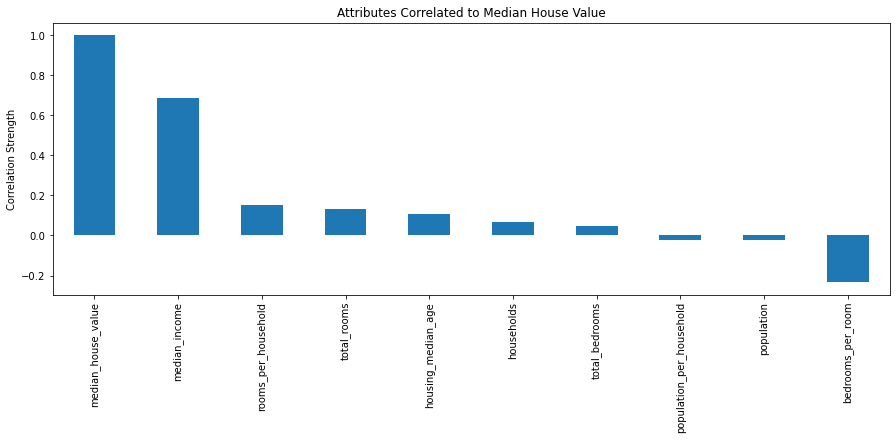

In [45]:
corr = corr.sort_values("median_house_value", ascending=False)
corr["median_house_value"].plot(kind='bar')
plt.title("Attributes Correlated to Median House Value")
plt.ylabel("Correlation Strength")
plt.show()

In [ ]:
#Above chart shows up which attributes are most strongly correlated the median house value of a block or neighborhood
#First median income, rooms perhoushold, median age, # of households to be built are the best varibales to consider when 
#valuating a neighborhood development project
#Seems bedrooms per room is negatively correlated to house value, so houses with a less bedrooms to total rooms ratio
#tend to have a higher value

In [46]:
X= housing_tr.drop(['longitude', 'latitude', 'total_bedrooms', 'bedrooms_per_room', 'median_house_value'], axis=1)
Y= housing_tr['median_house_value']

OLSmodel = sm.OLS(Y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          2.518e+04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                        0.00
Time:                        10:51:17   Log-Likelihood:                     -2.6143e+05
No. Observations:               20640   AIC:                                  5.229e+05
Df Residuals:                   20633   BIC:                                  5.229e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
housing_median_age        1420.5062     35.203     40.352      0.000    1351.506    1489.507
total_rooms                 -9.9451      0.755    -13.164      0.000     -11.426      -8.464
population                 -41.5838      1.163    -35.745      0.000     -43.864     -39.303
households                 188.6304      4.649     40.573      0.000     179.518     197.743
median_income             4.403e+04    292.035    150.755      0.000    4.35e+04    4.46e+04
population_per_household   -29.1725     52.832     -0.552      0.581    -132.727      74.382
rooms_per_household      -2087.1988    213.515     -9.775      0.000   -2505.706   -1668.692
==============================================================================
Omnibus:                     4751.252   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15700.681
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       6.590   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R Squared uncentered is quite high: .895
#Our formula:
# y = housing_median_age*1420.5062 + total_rooms*-9.9451 + population*-41.5838 + households*188.6304 + median_income*4.403e+04
# + population_per_household*-29.1725 + rooms_per_household*-2087.1988

#it might be possible to drop population and total_rooms because population of a neighborhood is really arbitrary and cannot 
#really be determined prior to building a new project, also total_rooms is redundant because we are already 
#considering rooms per houshold

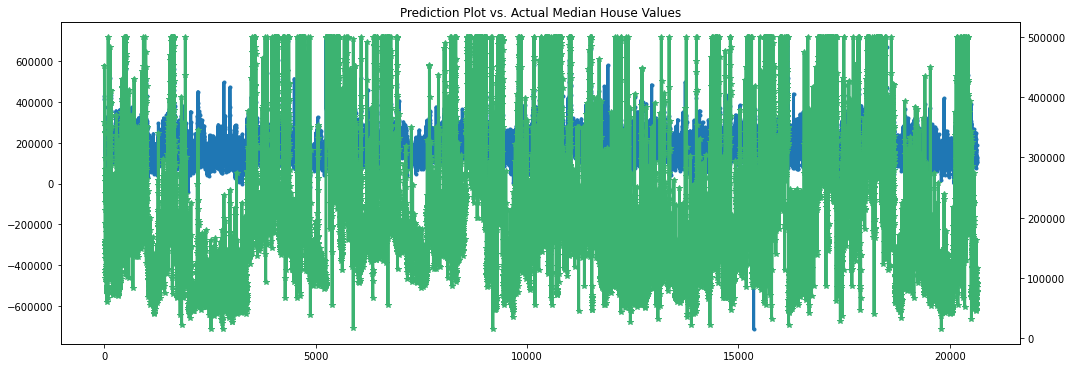

In [47]:
ax = OLSmodelResult.predict(X).plot(linewidth=3, marker='.')
ax2 = ax.twinx()
ax2.plot(housing_tr['median_house_value'], 'mediumseagreen', linewidth=3, marker='*')
plt.tight_layout()
plt.title("Prediction Plot vs. Actual Median House Values")
plt.show()

In [ ]:
#Our prediction formula would work nicely given we can get accurate approximated for our attributes ahead of time
#however there are so many other variables to consider outside the scope of this explored dataset ie)
# 1) Sqr Ft 2) Distance from School 3) Condition 4) Upgrades 5) Number of Buyer/Sellers in Neighborhood 6) Interest Rates
# 7) Other Economic Indicators